In [22]:
import sframe                            # see below for install instruction
import matplotlib.pyplot as plt          # plotting
import numpy as np                       # dense matrices
from scipy.sparse import csr_matrix      # sparse matrices
%matplotlib inline

In [23]:
wiki = sframe.SFrame('people_wiki.gl/')
wiki = wiki.add_row_number()             # add row number, starting at 0

In [24]:
print wiki

+----+-------------------------------+---------------------+
| id |              URI              |         name        |
+----+-------------------------------+---------------------+
| 0  | <http://dbpedia.org/resour... |    Digby Morrell    |
| 1  | <http://dbpedia.org/resour... |    Alfred J. Lewy   |
| 2  | <http://dbpedia.org/resour... |    Harpdog Brown    |
| 3  | <http://dbpedia.org/resour... | Franz Rottensteiner |
| 4  | <http://dbpedia.org/resour... |        G-Enka       |
| 5  | <http://dbpedia.org/resour... |    Sam Henderson    |
| 6  | <http://dbpedia.org/resour... |    Aaron LaCrate    |
| 7  | <http://dbpedia.org/resour... |   Trevor Ferguson   |
| 8  | <http://dbpedia.org/resour... |     Grant Nelson    |
| 9  | <http://dbpedia.org/resour... |     Cathy Caruth    |
+----+-------------------------------+---------------------+
+-------------------------------+
|              text             |
+-------------------------------+
| digby morrell born 10 octo... |
| alfred j

In [25]:
def load_sparse_csr(filename):
    loader = np.load(filename)
    data = loader['data']
    indices = loader['indices']
    indptr = loader['indptr']
    shape = loader['shape']
    
    return csr_matrix( (data, indices, indptr), shape)

In [26]:
word_count = load_sparse_csr('people_wiki_word_count.npz')

In [27]:
print word_count.shape

(59071, 547979)


In [28]:
map_index_to_word = sframe.SFrame('people_wiki_map_index_to_word.gl/')
print map_index_to_word

+---------+------------------------+-------+
| feature |        category        | index |
+---------+------------------------+-------+
| feature |    bioarchaeologist    |   0   |
| feature |      leaguehockey      |   1   |
| feature |      electionruss      |   2   |
| feature |        teramoto        |   3   |
| feature | trumpeterpercussionist |   4   |
| feature |        spoofax         |   5   |
| feature |      mendelssohni      |   6   |
| feature |       crosswise        |   7   |
| feature |          yec           |   8   |
| feature |      asianthemed       |   9   |
+---------+------------------------+-------+
[547979 rows x 3 columns]
Note: Only the head of the SFrame is printed.
You can use print_rows(num_rows=m, num_columns=n) to print more rows and columns.


In [29]:
from sklearn.neighbors import NearestNeighbors

model = NearestNeighbors(metric='euclidean', algorithm='brute')
model.fit(word_count)

NearestNeighbors(algorithm='brute', leaf_size=30, metric='euclidean',
         metric_params=None, n_neighbors=5, p=2, radius=1.0)

In [30]:
print wiki[wiki['name'] == 'Barack Obama']


+-------+-------------------------------+--------------+
|   id  |              URI              |     name     |
+-------+-------------------------------+--------------+
| 35817 | <http://dbpedia.org/resour... | Barack Obama |
+-------+-------------------------------+--------------+
+-------------------------------+
|              text             |
+-------------------------------+
| barack hussein obama ii br... |
+-------------------------------+
[? rows x 4 columns]
Note: Only the head of the SFrame is printed. This SFrame is lazily evaluated.
You can use sf.materialize() to force materialization.


In [31]:
#Let us run the k-nearest neighbor algorithm with Obama's article. 
#Since the NearestNeighbor class expects a vector, we pass the 35817th row of word_count vector.
#print word_count[35817]
distances, indices = model.kneighbors(word_count[35817], n_neighbors=10) # 1st arg: word count vector


In [32]:
#The query returns the indices of and distances to the 10 nearest neighbors.
#To display the indices and distances together with the article name, run
neighbors = sframe.SFrame({'distance':distances.flatten(), 'id':indices.flatten()})
print wiki.join(neighbors, on='id').sort('distance')[['id','name','distance']]

+-------+----------------------------+---------------+
|   id  |            name            |    distance   |
+-------+----------------------------+---------------+
| 35817 |        Barack Obama        |      0.0      |
| 24478 |         Joe Biden          | 33.0756708171 |
| 28447 |       George W. Bush       | 34.3947670438 |
| 35357 |      Lawrence Summers      | 36.1524549651 |
| 14754 |        Mitt Romney         | 36.1662826401 |
| 13229 |      Francisco Barrio      | 36.3318042492 |
| 31423 |       Walter Mondale       | 36.4005494464 |
| 22745 | Wynn Normington Hugh-Jones | 36.4965751818 |
| 36364 |         Don Bonker         |  36.633318168 |
|  9210 |        Andy Anstett        | 36.9594372252 |
+-------+----------------------------+---------------+
[10 rows x 3 columns]



In [33]:
print word_count[35817]

  (0, 32093)	1
  (0, 103658)	1
  (0, 120780)	1
  (0, 397642)	1
  (0, 409594)	1
  (0, 452469)	1
  (0, 492548)	1
  (0, 499835)	1
  (0, 512805)	1
  (0, 526389)	1
  (0, 526900)	1
  (0, 529331)	1
  (0, 529495)	1
  (0, 531329)	1
  (0, 531869)	1
  (0, 532290)	1
  (0, 533599)	1
  (0, 534868)	1
  (0, 535658)	1
  (0, 535765)	1
  (0, 535818)	1
  (0, 536238)	1
  (0, 536530)	1
  (0, 536610)	1
  (0, 536900)	1
  :	:
  (0, 547950)	4
  (0, 547953)	1
  (0, 547954)	2
  (0, 547955)	1
  (0, 547956)	3
  (0, 547957)	1
  (0, 547959)	4
  (0, 547960)	1
  (0, 547962)	3
  (0, 547963)	2
  (0, 547964)	11
  (0, 547965)	2
  (0, 547966)	7
  (0, 547967)	3
  (0, 547968)	2
  (0, 547969)	6
  (0, 547970)	5
  (0, 547971)	4
  (0, 547972)	14
  (0, 547973)	2
  (0, 547974)	7
  (0, 547975)	18
  (0, 547976)	30
  (0, 547977)	21
  (0, 547978)	40


In [18]:

print wiki

+----+-------------------------------+---------------------+
| id |              URI              |         name        |
+----+-------------------------------+---------------------+
| 0  | <http://dbpedia.org/resour... |    Digby Morrell    |
| 1  | <http://dbpedia.org/resour... |    Alfred J. Lewy   |
| 2  | <http://dbpedia.org/resour... |    Harpdog Brown    |
| 3  | <http://dbpedia.org/resour... | Franz Rottensteiner |
| 4  | <http://dbpedia.org/resour... |        G-Enka       |
| 5  | <http://dbpedia.org/resour... |    Sam Henderson    |
| 6  | <http://dbpedia.org/resour... |    Aaron LaCrate    |
| 7  | <http://dbpedia.org/resour... |   Trevor Ferguson   |
| 8  | <http://dbpedia.org/resour... |     Grant Nelson    |
| 9  | <http://dbpedia.org/resour... |     Cathy Caruth    |
+----+-------------------------------+---------------------+
+-------------------------------+-------------------------------+
|              text             |           word_count          |
+-------------

In [19]:
#To make things even easier, we provide a utility function that displays a dictionary in tabular form:


def top_words(name):
    """
    Get a table of the most frequent words in the given person's wikipedia page.
    """
    row = wiki[wiki['name'] == name]
    word_count_table = row[['word_count']].stack('word_count', new_column_name=['word','count'])
    return word_count_table.sort('count', ascending=False)

obama_words = top_words('Barack Obama')
print obama_words

barrio_words = top_words('Francisco Barrio')
print barrio_words

+-------+-------+
|  word | count |
+-------+-------+
|  the  |   40  |
|   in  |   30  |
|  and  |   21  |
|   of  |   18  |
|   to  |   14  |
|  his  |   11  |
| obama |   9   |
|  act  |   8   |
|   a   |   7   |
|   he  |   7   |
+-------+-------+
[273 rows x 2 columns]
Note: Only the head of the SFrame is printed.
You can use print_rows(num_rows=m, num_columns=n) to print more rows and columns.
+-----------+-------+
|    word   | count |
+-----------+-------+
|    the    |   36  |
|     of    |   24  |
|    and    |   18  |
|     in    |   17  |
|     he    |   10  |
|     to    |   9   |
| chihuahua |   7   |
|     a     |   6   |
|  governor |   6   |
|     as    |   5   |
+-----------+-------+
[225 rows x 2 columns]
Note: Only the head of the SFrame is printed.
You can use print_rows(num_rows=m, num_columns=n) to print more rows and columns.


In [20]:
combined_words = obama_words.join(barrio_words, on='word')
print combined_words

+------+-------+---------+
| word | count | count.1 |
+------+-------+---------+
| the  |   40  |    36   |
|  in  |   30  |    17   |
| and  |   21  |    18   |
|  of  |   18  |    24   |
|  to  |   14  |    9    |
| his  |   11  |    5    |
|  a   |   7   |    6    |
|  he  |   7   |    10   |
|  as  |   6   |    5    |
| was  |   5   |    4    |
+------+-------+---------+
[56 rows x 3 columns]
Note: Only the head of the SFrame is printed.
You can use print_rows(num_rows=m, num_columns=n) to print more rows and columns.


In [21]:
#Since both tables contained the column named count, 
#SFrame automatically renamed one of them to prevent confusion. 
#Let's rename the columns to tell which one is for which. 
#By inspection, we see that the first column (count) is for Obama and the second (count.1) for Barrio.
combined_words = combined_words.rename({'count':'Obama', 'count.1':'Barrio'})
print combined_words

+------+-------+--------+
| word | Obama | Barrio |
+------+-------+--------+
| the  |   40  |   36   |
|  in  |   30  |   17   |
| and  |   21  |   18   |
|  of  |   18  |   24   |
|  to  |   14  |   9    |
| his  |   11  |   5    |
|  a   |   7   |   6    |
|  he  |   7   |   10   |
|  as  |   6   |   5    |
| was  |   5   |   4    |
+------+-------+--------+
[56 rows x 3 columns]
Note: Only the head of the SFrame is printed.
You can use print_rows(num_rows=m, num_columns=n) to print more rows and columns.


In [28]:
combined_words_df=combined_words.sort('Obama', ascending=False).head(5)
#print combined_words_df['word']

In [29]:
common_words = set(combined_words_df['word'])  # YOUR CODE HERE

def has_top_words(word_count_vector):
    # extract the keys of word_count_vector and convert it to a set
    #print word_count_vector
    arr_keys=np.array(word_count_vector.keys())
    unique_words=set(word_count_vector.keys())
    #print common_words
    #print unique_words.issubset(common_words)
    if common_words.issubset(unique_words):
        return True
    else:
        return False;
    #return True if common_words is a subset of unique_words
    # return False otherwise
    #return ...  # YOUR CODE HERE

#wiki['has_top_words'] =
wiki['word_count'].apply(has_top_words)
# use has_top_words column to answer the quiz question
#... # YOUR CODE HERE

dtype: int
Rows: 59071
[1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ... ]

In [30]:
print 'Output from your function:', has_top_words(wiki[32]['word_count'])
print 'Correct output: True'
print 'Also check the length of unique_words. It should be 167'

print 'Output from your function:', has_top_words(wiki[33]['word_count'])
print 'Correct output: False'
print 'Also check the length of unique_words. It should be 188'

Output from your function: True
Correct output: True
Also check the length of unique_words. It should be 167
Output from your function: False
Correct output: False
Also check the length of unique_words. It should be 188


In [31]:
print np.array(wiki['word_count'][0].keys()).shape

(139,)


In [32]:
tf_idf = load_sparse_csr('people_wiki_tf_idf.npz')

In [33]:
print tf_idf

  (0, 5877)	10.9864953892
  (0, 92219)	10.9864953892
  (0, 227191)	10.9864953892
  (0, 446948)	9.88788310056
  (0, 468870)	9.60020102811
  (0, 477285)	46.885287384
  (0, 492466)	9.04058524017
  (0, 509506)	8.58860011643
  (0, 514262)	8.34743805961
  (0, 523996)	7.8510011733
  (0, 528953)	7.48998782776
  (0, 529843)	7.43114732774
  (0, 533540)	7.0744723838
  (0, 535034)	20.726873836
  (0, 535475)	6.85936100418
  (0, 538022)	6.50915857475
  (0, 538168)	6.48668571889
  (0, 540827)	6.01668208965
  (0, 541501)	5.86850157681
  (0, 541760)	5.81601139419
  (0, 542488)	5.63463725575
  (0, 542854)	5.53117427387
  (0, 542859)	5.53117427387
  (0, 542919)	5.51003183729
  (0, 543517)	10.6820969832
  :	:
  (59070, 547944)	1.17742841231
  (59070, 547947)	1.08907621209
  (59070, 547949)	0.97747733548
  (59070, 547950)	0.944333442001
  (59070, 547951)	0.930930733809
  (59070, 547954)	0.847343004821
  (59070, 547957)	1.32281389334
  (59070, 547960)	0.749106824124
  (59070, 547961)	0.298239089082
  (59070

In [34]:
wiki['tf_idf'] = unpack_dict(tf_idf, map_index_to_word)

In [35]:
print wiki['tf_idf']

[{'selection': 3.836578553093086, 'carltons': 7.0744723837970485, 'being': 1.7938099524877322, '2005': 1.6425861253275964, 'coach': 5.444264118987054, 'its': 1.6875948402695313, 'before': 2.9935647453367427, 'australia': 2.86858644684204, '21': 2.797250863489293, 'northern': 3.310021742836038, 'bullants': 7.489987827758714, 'to': 0.23472468840899613, 'perth': 5.051601193605607, 'sydney': 3.5981675296480873, '2014': 2.2073995783446634, 'has': 0.428497539744039, 'footballer': 3.2388985505323085, '2013': 1.9545642372230505, 'division': 2.7906099979103978, 'brisbaneafter': 10.986495389225194, 'rules': 3.8272034844276295, 'assistant': 2.5220702633476124, 'spanned': 5.531174273867493, 'early': 1.929422753652229, 'game': 2.4168995190159084, 'five': 2.2137301792754096, 'during': 1.3174651479035495, 'continued': 2.720588055069447, '44game': 9.887883100557085, 'cause': 4.8023464982877115, 'twice': 3.3301582227950113, 'round': 2.897933583948961, 'parade': 5.510031837293684, 'born': 0.268196273764

In [103]:
model_tf_idf = NearestNeighbors(metric='euclidean', algorithm='brute')
model_tf_idf.fit(tf_idf)
distances, indices = model_tf_idf.kneighbors(tf_idf[35817], n_neighbors=10)

In [104]:
neighbors = sframe.SFrame({'distance':distances.flatten(), 'id':indices.flatten()})
print wiki.join(neighbors, on='id').sort('distance')[['id', 'name', 'distance']]

+-------+-------------------------+---------------+
|   id  |           name          |    distance   |
+-------+-------------------------+---------------+
| 35817 |       Barack Obama      |      0.0      |
|  7914 |      Phil Schiliro      | 106.861013691 |
| 46811 |      Jeff Sessions      | 108.871674216 |
| 44681 |  Jesse Lee (politician) | 109.045697909 |
| 38376 |      Samantha Power     | 109.108106165 |
|  6507 |       Bob Menendez      | 109.781867105 |
| 38714 | Eric Stern (politician) |  109.95778808 |
| 44825 |      James A. Guest     | 110.413888718 |
| 44368 |   Roland Grossenbacher  |  110.4706087  |
| 33417 |      Tulsi Gabbard      | 110.696997999 |
+-------+-------------------------+---------------+
[10 rows x 3 columns]



In [105]:
def top_words_tf_idf(name):
    row = wiki[wiki['name'] == name]
    word_count_table = row[['tf_idf']].stack('tf_idf', new_column_name=['word','weight'])
    return word_count_table.sort('weight', ascending=False)

obama_tf_idf = top_words_tf_idf('Barack Obama')
print obama_tf_idf

schiliro_tf_idf = top_words_tf_idf('Phil Schiliro')
print schiliro_tf_idf

+-------------+---------------+
|     word    |     weight    |
+-------------+---------------+
|    obama    | 43.2956530721 |
|     act     |  27.678222623 |
|     iraq    |  17.747378588 |
|   control   | 14.8870608452 |
|     law     | 14.7229357618 |
|   ordered   | 14.5333739509 |
|   military  | 13.1159327785 |
|   response  | 12.7843852412 |
| involvement | 12.7843852412 |
|  democratic | 12.4106886973 |
+-------------+---------------+
[273 rows x 2 columns]
Note: Only the head of the SFrame is printed.
You can use print_rows(num_rows=m, num_columns=n) to print more rows and columns.
+-----------------+---------------+
|       word      |     weight    |
+-----------------+---------------+
|     schiliro    | 21.9729907785 |
|      staff      | 15.8564416352 |
|  congressional  | 13.5470876563 |
| daschleschiliro | 10.9864953892 |
|      obama      | 9.62125623824 |
|      waxman     | 9.04058524017 |
|    president    | 9.03358661416 |
|     2014from    | 8.68391029623 |
|    

In [106]:
# Comptue length of all documents
def compute_length(row):
    return len(row['text'].split(' '))
wiki['length'] = wiki.apply(compute_length)

# Compute 100 nearest neighbors and display their lengths
distances, indices = model_tf_idf.kneighbors(tf_idf[35817], n_neighbors=100)
neighbors = sframe.SFrame({'distance':distances.flatten(), 'id':indices.flatten()})
nearest_neighbors_euclidean = wiki.join(neighbors, on='id')[['id', 'name', 'length', 'distance']].sort('distance')
print nearest_neighbors_euclidean

+-------+-------------------------+--------+---------------+
|   id  |           name          | length |    distance   |
+-------+-------------------------+--------+---------------+
| 35817 |       Barack Obama      |  540   |      0.0      |
|  7914 |      Phil Schiliro      |  208   | 106.861013691 |
| 46811 |      Jeff Sessions      |  230   | 108.871674216 |
| 44681 |  Jesse Lee (politician) |  216   | 109.045697909 |
| 38376 |      Samantha Power     |  310   | 109.108106165 |
|  6507 |       Bob Menendez      |  220   | 109.781867105 |
| 38714 | Eric Stern (politician) |  255   |  109.95778808 |
| 44825 |      James A. Guest     |  215   | 110.413888718 |
| 44368 |   Roland Grossenbacher  |  201   |  110.4706087  |
| 33417 |      Tulsi Gabbard      |  228   | 110.696997999 |
+-------+-------------------------+--------+---------------+
[100 rows x 4 columns]
Note: Only the head of the SFrame is printed.
You can use print_rows(num_rows=m, num_columns=n) to print more rows and colu

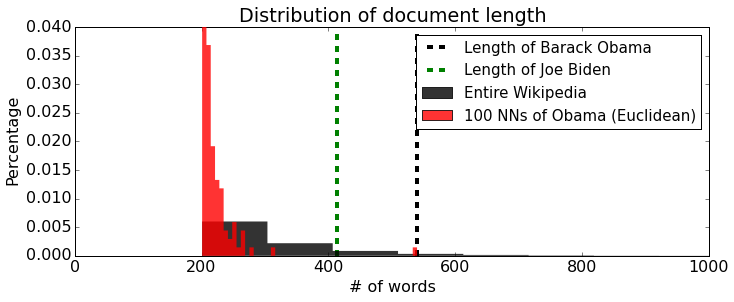

In [107]:
plt.figure(figsize=(10.5,4.5))
plt.hist(wiki['length'], 50, color='k', edgecolor='None', histtype='stepfilled', normed=True,
         label='Entire Wikipedia', zorder=3, alpha=0.8)
plt.hist(nearest_neighbors_euclidean['length'], 50, color='r', edgecolor='None', histtype='stepfilled', normed=True,
         label='100 NNs of Obama (Euclidean)', zorder=10, alpha=0.8)
plt.axvline(x=wiki['length'][wiki['name'] == 'Barack Obama'][0], color='k', linestyle='--', linewidth=4,
           label='Length of Barack Obama', zorder=2)
plt.axvline(x=wiki['length'][wiki['name'] == 'Joe Biden'][0], color='g', linestyle='--', linewidth=4,
           label='Length of Joe Biden', zorder=1)
plt.axis([0, 1000, 0, 0.04])

plt.legend(loc='best', prop={'size':15})
plt.title('Distribution of document length')
plt.xlabel('# of words')
plt.ylabel('Percentage')
plt.rcParams.update({'font.size':16})
plt.tight_layout()

In [114]:
model2_tf_idf = NearestNeighbors(algorithm='brute', metric='cosine')
model2_tf_idf.fit(tf_idf)
distances, indices = model2_tf_idf.kneighbors(tf_idf[35817], n_neighbors=100)
neighbors = sframe.SFrame({'distance':distances.flatten(), 'id':indices.flatten()})
nearest_neighbors_cosine = wiki.join(neighbors, on='id')[['id', 'name', 'length', 'distance']].sort('distance')
print nearest_neighbors_cosine

+-------+-------------------------+--------+--------------------+
|   id  |           name          | length |      distance      |
+-------+-------------------------+--------+--------------------+
| 35817 |       Barack Obama      |  540   | -1.11022302463e-15 |
| 24478 |        Joe Biden        |  414   |   0.703138676734   |
| 38376 |      Samantha Power     |  310   |   0.742981902328   |
| 57108 |  Hillary Rodham Clinton |  580   |   0.758358397887   |
| 38714 | Eric Stern (politician) |  255   |   0.770561227601   |
| 46140 |       Robert Gibbs      |  257   |   0.784677504751   |
|  6796 |       Eric Holder       |  232   |   0.788039072943   |
| 44681 |  Jesse Lee (politician) |  216   |   0.790926415366   |
| 18827 |       Henry Waxman      |  279   |   0.798322602893   |
|  2412 |     Joe the Plumber     |  217   |   0.799466360042   |
+-------+-------------------------+--------+--------------------+
[100 rows x 4 columns]
Note: Only the head of the SFrame is printed.
You can

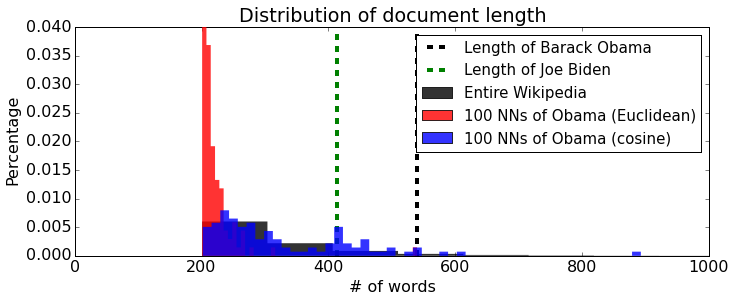

In [115]:
plt.figure(figsize=(10.5,4.5))
plt.figure(figsize=(10.5,4.5))
plt.hist(wiki['length'], 50, color='k', edgecolor='None', histtype='stepfilled', normed=True,
         label='Entire Wikipedia', zorder=3, alpha=0.8)
plt.hist(nearest_neighbors_euclidean['length'], 50, color='r', edgecolor='None', histtype='stepfilled', normed=True,
         label='100 NNs of Obama (Euclidean)', zorder=10, alpha=0.8)
plt.hist(nearest_neighbors_cosine['length'], 50, color='b', edgecolor='None', histtype='stepfilled', normed=True,
         label='100 NNs of Obama (cosine)', zorder=11, alpha=0.8)
plt.axvline(x=wiki['length'][wiki['name'] == 'Barack Obama'][0], color='k', linestyle='--', linewidth=4,
           label='Length of Barack Obama', zorder=2)
plt.axvline(x=wiki['length'][wiki['name'] == 'Joe Biden'][0], color='g', linestyle='--', linewidth=4,
           label='Length of Joe Biden', zorder=1)
plt.axis([0, 1000, 0, 0.04])
plt.legend(loc='best', prop={'size':15})
plt.title('Distribution of document length')
plt.xlabel('# of words')
plt.ylabel('Percentage')
plt.rcParams.update({'font.size': 16})
plt.tight_layout()

In [116]:
#TF-IDF Vectors
tweet = {'act': 3.4597778278724887,
 'control': 3.721765211295327,
 'democratic': 3.1026721743330414,
 'governments': 4.167571323949673,
 'in': 0.0009654063501214492,
 'law': 2.4538226269605703,
 'popular': 2.764478952022998,
 'response': 4.261461747058352,
 'to': 0.04694493768179923}

In [117]:
word_indices = [map_index_to_word[map_index_to_word['category']==word][0]['index'] for word in tweet.keys()]
tweet_tf_idf = csr_matrix( (list(tweet.values()), ([0]*len(word_indices), word_indices)),
                          shape=(1, tf_idf.shape[1]) )

In [118]:
word_indices = [map_index_to_word[map_index_to_word['category']==word][0]['index'] for word in tweet.keys()]
tweet_tf_idf = csr_matrix( (list(tweet.values()), ([0]*len(word_indices), word_indices)),
                          shape=(1, tf_idf.shape[1]) )

In [119]:

#With cosine distances, the tweet is "nearer" to Barack Obama than everyone else, 
#except for Joe Biden! This probably is not something we want. If someone is reading the Barack Obama Wikipedia page, 
#would you want to recommend they read this tweet? Ignoring article lengths completely resulted in nonsensical results.
from sklearn.metrics.pairwise import cosine_distances

obama_tf_idf = tf_idf[35817]
print cosine_distances(obama_tf_idf, tweet_tf_idf)

[[ 0.70591838]]
